In [1]:
# EDA,Data Cleaning and importing libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('https://raw.githubusercontent.com/nickkatsy/python_ml_ect_/master/Mall_Customers.csv')

data.info()

data.isna().sum()


df = data.copy()
df.nunique()
df.describe()

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memo

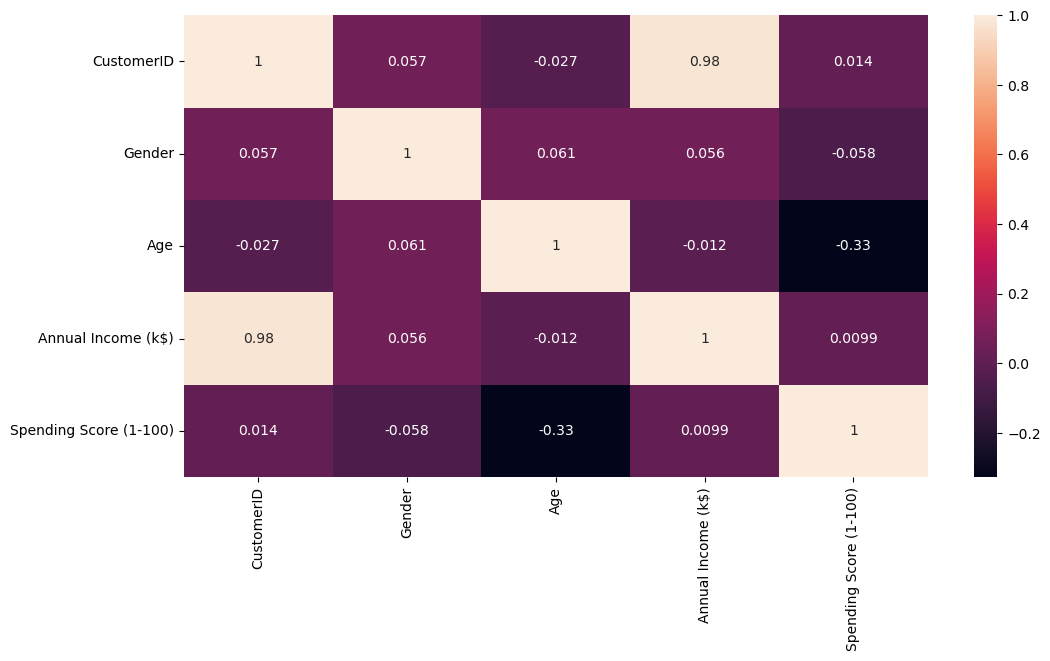

In [2]:
# heatmap to see correlations between the features in the dataset
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


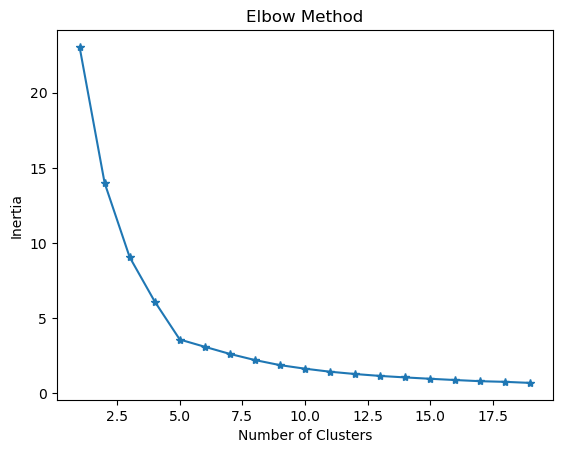

In [3]:
# picking the features from the dataset and defining them as 'X' so I can then use 'The Elbow Method' through kmeans 
# clustering to find the optimal number of clusters to choose
df.info()
df.columns

X = df[['Annual Income (k$)','Spending Score (1-100)']]



from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X = ms.fit_transform(X)

from sklearn.cluster import KMeans


#Elbow method to find optimal number of clusters

cs = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',n_init=20,random_state=42).fit(X)
    cs.append(kmeans.inertia_)
    


plt.plot(range(1,20),cs,marker='*')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

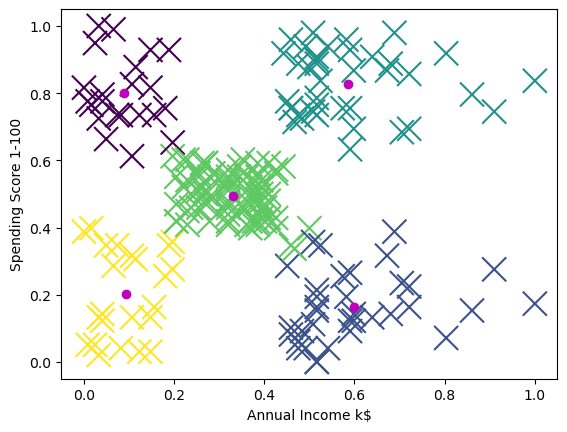

In [4]:
# the elbow method shows diminishing returns at k=5 clusters, therefore, 5 will be the number of clusters selected


k = 5

kmeans = KMeans(n_clusters=k,init='k-means++',n_init=20,random_state=42).fit(X)
labels = kmeans.labels_
df['Cluster'] = labels


plt.scatter(X[:,0],X[:,1],c=df['Cluster'],marker='x',s=300,edgecolors='r')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='m')
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score 1-100')
plt.show()

In [5]:
# scoring the optimal number of clusters using 'Silhouette Score' and the inertia level
from sklearn.metrics import silhouette_score

pred = kmeans.predict(X)
Sil_Score = silhouette_score(X,pred)
print(f'Silhouette score: {Sil_Score*100:.2f}%')
print(f'Cluster Sum-of-squares: {kmeans.inertia_}')
print(kmeans.cluster_centers_)

Silhouette score: 55.95%
Cluster Sum-of-squares: 3.583117905952561
[[0.08792846 0.79962894]
 [0.6        0.16443149]
 [0.58638083 0.82783883]
 [0.33029751 0.49508692]
 [0.09265859 0.20319432]]
